In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-the-success-of-bank-telemarketing/sample_submission.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv


In [2]:
# from sklearn.dummy import DummyClassifier
# df = pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv')
# X = df.drop("target",axis = 1)
# y = df["target"]

# model = DummyClassifier(strategy='stratified')
# model.fit(X,y)

# X_test = pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv')
# y_pred = model.predict(X_test)
# submission = pd.DataFrame({ 'id': range(1,10001),
#                             'target': y_pred})

# submission.to_csv( 'submission.csv', index = False)

## importing libraries

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from sklearn.compose import make_column_transformer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.metrics import roc_curve, auc


## Data loading

In [4]:
df_train=pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv')
df_test = pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv')

## EDA and VISUALIZATION

**DATASET**

In [5]:
df_train.head()

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
0,2009-04-17,26,blue-collar,married,secondary,no,647,yes,no,cellular,357,2,331,1,other,no
1,2009-10-11,52,technician,married,secondary,no,553,yes,no,telephone,160,1,-1,0,NaN,no
2,2010-11-20,44,blue-collar,married,secondary,no,1397,no,no,cellular,326,1,-1,0,NaN,no
3,2009-09-01,33,admin.,married,secondary,no,394,yes,no,telephone,104,3,-1,0,NaN,no
4,2008-01-29,31,entrepreneur,single,tertiary,no,137,no,no,cellular,445,2,-1,0,NaN,no


In [6]:
df_train.tail()

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
39206,2008-07-31,31,technician,single,secondary,no,0,yes,no,cellular,16,34,-1,0,NaN,no
39207,2009-07-31,59,admin.,married,primary,no,6187,no,no,cellular,114,4,-1,0,NaN,no
39208,2008-06-02,36,blue-collar,married,secondary,no,63,yes,no,NaN,56,8,-1,0,NaN,no
39209,2010-03-20,28,student,single,secondary,no,5916,no,no,cellular,93,5,-1,0,NaN,no
39210,2010-03-16,51,student,divorced,tertiary,yes,38594,yes,no,cellular,1877,19,780,148,success,yes


*Columns And Their Meaning:*

1 last contact date: last contact date

2 age (numeric)

3 job : type of job

4 marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

5 education (categorical: "unknown","secondary","primary","tertiary")

6 default: has credit in default? (binary: "yes","no")

7 balance: average yearly balance, in euros (numeric)

8 housing: has housing loan? (binary: "yes","no")

9 loan: has personal loan? (binary: "yes","no")

10 contact: contact communication type (categorical: "unknown","telephone","cellular")

11 duration: last contact duration, in seconds (numeric)

12 campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

14 previous: number of contacts performed before this campaign and for this client (numeric)

15 poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

*target variable:*

16 target: has the client subscribed a term deposit? (binary: "yes","no")

**shape of train and test dataset**

In [7]:
print(df_train.shape)
print(df_test.shape)


(39211, 16)
(10000, 15)


In [8]:
df_test["target"]=None
print(df_test.shape)

(10000, 16)


**Null values**

In [9]:
df_train.isna().sum()

last contact date        0
age                      0
job                    229
marital                  0
education             1467
default                  0
balance                  0
housing                  0
loan                     0
contact              10336
duration                 0
campaign                 0
pdays                    0
previous                 0
poutcome             29451
target                   0
dtype: int64

contact has 10,336 missing values

poutcome has 29,451 missing values, affecting analysis of previous campaign outcomes.

education has 1,467 missing values, limiting demographic insights.

job has 229 missing values

all other columns doesn't have any null values

In [10]:
df_train.isnull().mean() * 100

last contact date     0.000000
age                   0.000000
job                   0.584020
marital               0.000000
education             3.741297
default               0.000000
balance               0.000000
housing               0.000000
loan                  0.000000
contact              26.359950
duration              0.000000
campaign              0.000000
pdays                 0.000000
previous              0.000000
poutcome             75.109026
target                0.000000
dtype: float64

percentage og missing vales  - here we observe that job has 58.40% ,education has 3.74%, contact has 26.35% null values. Whereas poutcome has highest numbner of null values.

**Description of data**

In [11]:
df_train.describe()

,age,balance,duration,campaign,pdays,previous
count,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000
mean,42.120247,5441.781719,439.062789,5.108770,72.256051,11.826171
std,12.709352,16365.292065,769.096291,9.890153,160.942593,44.140259
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,98.000000,109.000000,1.000000,-1.000000,0.000000
50%,40.000000,549.000000,197.000000,2.000000,-1.000000,0.000000
75%,50.000000,2030.000000,380.000000,4.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


* Average age is 42.12, ranging from 18 to 95 years
 
* Mean balance is 5,441.78 with high variability and a minimum of -8,019.

* Average call duration is 439 seconds, ranging from 0 to 4,918 seconds.
 
* Mean campaign contacts are 5, with a range of 1 to 63.
 
* pdays mean is 72.26, but many entries have -1 (no prior contact).
 
* Average previous contacts are 11.83, with a wide range from 0 to 275.

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  39211 non-null  object
 1   age                39211 non-null  int64 
 2   job                38982 non-null  object
 3   marital            39211 non-null  object
 4   education          37744 non-null  object
 5   default            39211 non-null  object
 6   balance            39211 non-null  int64 
 7   housing            39211 non-null  object
 8   loan               39211 non-null  object
 9   contact            28875 non-null  object
 10  duration           39211 non-null  int64 
 11  campaign           39211 non-null  int64 
 12  pdays              39211 non-null  int64 
 13  previous           39211 non-null  int64 
 14  poutcome           9760 non-null   object
 15  target             39211 non-null  object
dtypes: int64(6), object(10)
memory usage: 4.

categorical - we have 10 columns with categorical data

numerical - we have 6 columns with numerical data

In [13]:
print(df_train['age'].unique())
print(df_train['age'].nunique())

[26 52 44 33 31 25 46 37 38 32 28 34 86 42 58 39 35 47 45 48 30 50 56 54
 40 53 41 51 27 29 57 63 36 43 19 55 49 23 83 60 22 80 76 59 24 93 71 89
 64 68 85 79 62 69 20 90 66 87 72 88 67 70 77 91 78 61 65 73 74 84 82 92
 81 18 21 75 94 95]
78


**Number of unique values**

In [14]:
unique_counts = {col: df_train[col].nunique() for col in df_train.columns}
for col, count in unique_counts.items():
    print(f"{col}: {count}")




last contact date: 1013
age: 78
job: 11
marital: 3
education: 3
default: 2
balance: 9535
housing: 2
loan: 2
contact: 2
duration: 3146
campaign: 63
pdays: 865
previous: 276
poutcome: 3
target: 2


Here are the number of unique values in each column


**value count**

In [15]:
df_train['education'].value_counts()

education
secondary    19584
tertiary     11615
primary       6545
Name: count, dtype: int64

In [16]:
df_train['education'].value_counts()/len(df_train)*100

education
secondary    49.945168
tertiary     29.621790
primary      16.691745
Name: count, dtype: float64

In [17]:
df_train['pdays'].value_counts()

pdays
-1      29446
 182      135
 92       117
 91       106
 183      100
        ...  
 836        1
 594        1
 659        1
 817        1
 724        1
Name: count, Length: 865, dtype: int64

In [18]:
raw_categorical_cols = [i for i in df_train.columns if df_train[i].nunique() <= 15]
raw_categorical_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'poutcome',
 'target']

In [19]:
for col in raw_categorical_cols:
    percentages = df_train[col].value_counts(normalize=True) * 100
    print(f"{col}:\n{percentages}\n")


job:
job
blue-collar      19.947668
management       19.142168
technician       15.591812
admin.           10.558719
services          8.529578
self-employed     4.776564
retired           4.679083
entrepreneur      4.630342
unemployed        4.322508
housemaid         4.248115
student           3.573444
Name: proportion, dtype: float64

marital:
marital
married     57.868965
single      28.690929
divorced    13.440106
Name: proportion, dtype: float64

education:
education
secondary    51.886393
tertiary     30.773103
primary      17.340504
Name: proportion, dtype: float64

default:
default
no     94.243962
yes     5.756038
Name: proportion, dtype: float64

housing:
housing
yes    55.23195
no     44.76805
Name: proportion, dtype: float64

loan:
loan
no     81.150698
yes    18.849302
Name: proportion, dtype: float64

contact:
contact
cellular     86.683983
telephone    13.316017
Name: proportion, dtype: float64

poutcome:
poutcome
failure    50.706967
other      26.229508
success    23.

value_counts(normalize=True) is used to get the relative frequency (percentage) directly.

**Job:**

Blue-collar: 19.95%

Management: 19.14%

Technician: 15.59%

Admin: 10.56% 

Services: 8.53%

Others: < 5%

**Marital Status:**

Married: 57.87%

Single: 28.69%

Divorced: 13.44%

**Education:**

Secondary: 51.89% 

Tertiary: 30.77%

Primary: 17.34%

**Default:**

No: 94.24%

Yes: 5.76%

**Housing:**

Yes: 55.23%

No: 44.77%

**Loan:**

No: 81.15%

Yes: 18.85%

**Contact:**

Cellular: 86.68%

Telephone: 13.32%

Previous Outcome:

Failure: 50.71%

Other: 26.23%

Success: 23.06%

**Target:**

No: 85.14%

Yes: 14.86%

**Univariate Analysis:** Examines a single variable to understand its distribution, central tendency, and spread.(also with target column)

**Multivariate Analysis:** Analyzes multiple variables simultaneously to explore relationships, patterns, and interactions between them.

## Univariate analysis

## AGE

In [20]:
df_train.columns

Index(['last contact date', 'age', 'job', 'marital', 'education', 'default',
       'balance', 'housing', 'loan', 'contact', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'target'],
      dtype='object')

In [21]:
df_train.age.describe()


count    39211.000000
mean        42.120247
std         12.709352
min         18.000000
25%         33.000000
50%         40.000000
75%         50.000000
max         95.000000
Name: age, dtype: float64

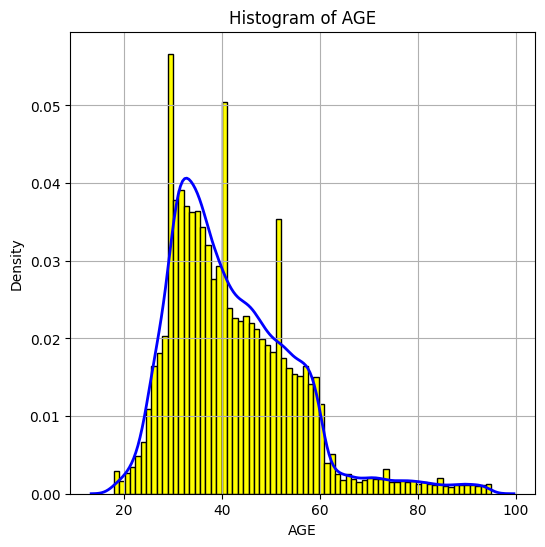

In [22]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(6, 6))


plt.hist(df_train['age'], bins=70, color='yellow', edgecolor='black', density=True)

sns.kdeplot(df_train['age'], color='blue', linewidth=2)

plt.title("Histogram of AGE")
plt.xlabel("AGE")
plt.ylabel("Density")
plt.grid(True)    # make easier to read

plt.show()


sns.kdeplot()- which allows for more customization of each plot component.

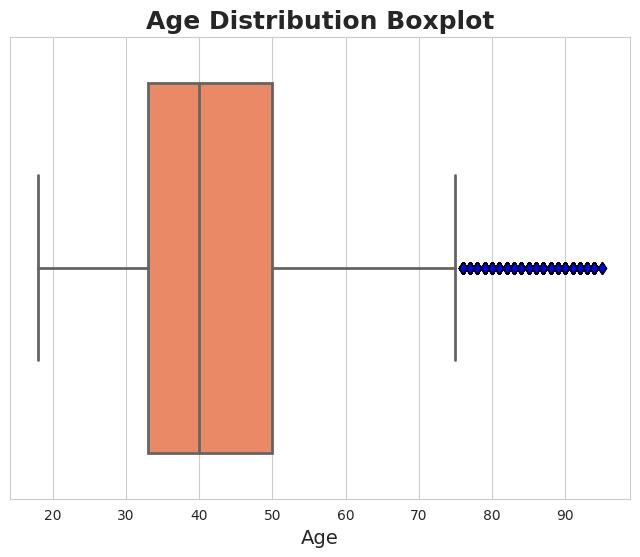

In [23]:
sns.set_style("whitegrid")

plt.figure(figsize=(8, 6))


sns.boxplot(data=df_train, x='age',
            color='coral', 
            linewidth=2, 
            fliersize=6, 
            flierprops={'markerfacecolor': 'blue', 'markeredgecolor': 'black'})

plt.title("Age Distribution Boxplot", fontsize=18, 
          fontweight='bold')
plt.xlabel("Age", fontsize=14)

plt.show()


In [24]:
print(df_train['age'].skew())


1.124277825963419


**Boxplot:**

*Median Age:* Approximately 40 years, indicating the midpoint of the population.


*Interquartile Range (IQR):* Ranges from about 32 to 50 years, suggesting the central 50% of ages.


*Outliers:* Several outliers exist above 75 years, highlighting a few significantly older individuals.

**Histogram with KDE:**

*Distribution:* Right-skewed, with most individuals concentrated between 30-40 years.


*Density Peaks:* Highest frequency around 30-40 years, reflecting common ages.


*Older Age Tail:* Gradual decline in frequency for ages above 50, confirming fewer older individuals.

## job

In [25]:
df_train.job.unique


<bound method Series.unique of 0         blue-collar
1          technician
2         blue-collar
3              admin.
4        entrepreneur
             ...     
39206      technician
39207          admin.
39208     blue-collar
39209         student
39210         student
Name: job, Length: 39211, dtype: object>

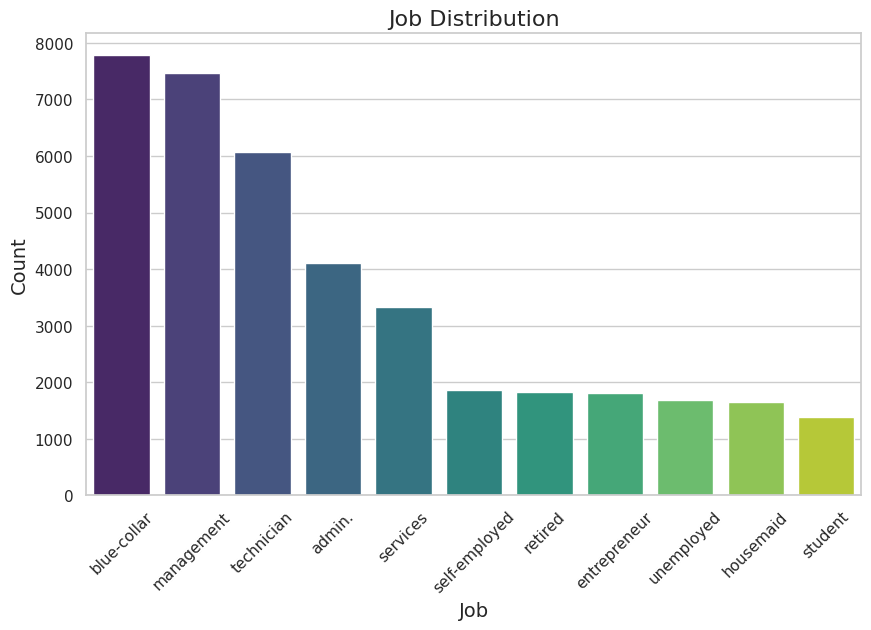

In [26]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='job', order=df_train['job'].value_counts().index, palette='viridis')
plt.title('Job Distribution', fontsize=16)
plt.xlabel('Job', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()


In [27]:
# plt.figure(figsize=(8, 7))
# job_percentage.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
# plt.title('Job Distribution Pie Chart', fontsize=16)
# plt.ylabel('')
# plt.show()


*Dominant Roles:* "Blue-collar" and "management" jobs are the most prevalent.


*Moderate Presence:* "Technician" and "admin." positions have significant representation.


*Less Representation:* Job categories like "self-employed," "retired," "entrepreneur," "housemaid," and "student" are underrepresented.


In [28]:
# Percentage of missing value 
missing_percentage = df_train['job'].isnull().mean() * 100
print(f"Missing values percentage in job column: {missing_percentage:.2f}%")


Missing values percentage in job column: 0.58%


## marital

In [29]:
marital_percentage = df_train.marital.value_counts()/len(df_train)*100
marital_percentage

marital
married     57.868965
single      28.690929
divorced    13.440106
Name: count, dtype: float64

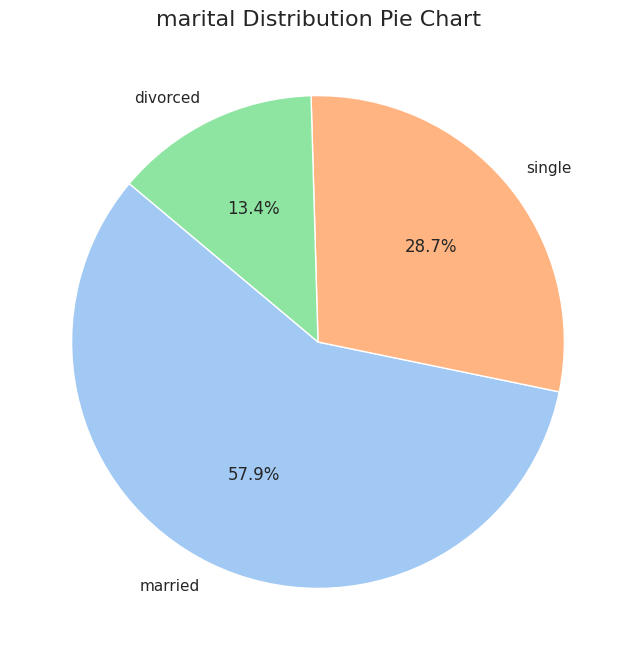

In [30]:
plt.figure(figsize=(8, 8))
marital_percentage.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('marital Distribution Pie Chart', fontsize=16)
plt.ylabel('')
plt.show()

*INSIGHTS*


married people are dominating followed by single and divorced

## Education

In [31]:
df_train.education.unique()

array(['secondary', 'tertiary', 'primary', nan], dtype=object)

In [32]:
df_train.education.value_counts()

education
secondary    19584
tertiary     11615
primary       6545
Name: count, dtype: int64

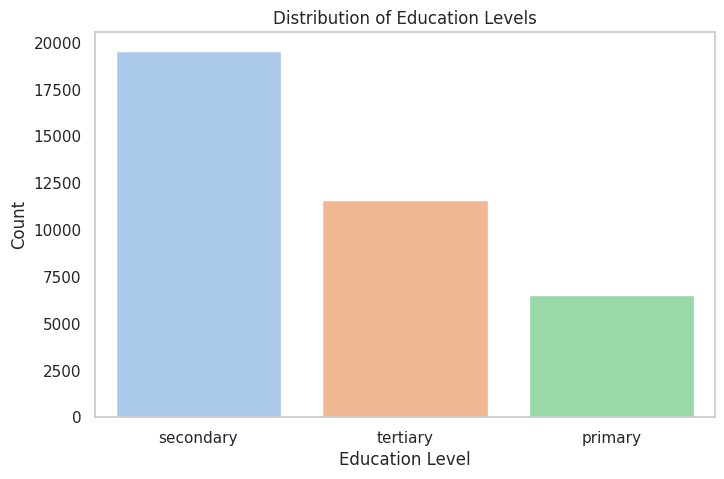

In [33]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_train, x='education', palette='pastel')
plt.title('Distribution of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()


*INSIGHTS*

secondary> tertiary> primary

In [34]:
missing_percentage = df_train['education'].isnull().mean() * 100
print(f"Missing values percentage in education column: {missing_percentage:.2f}%")


Missing values percentage in education column: 3.74%


## default
(has credit in default)

In [35]:
default_percentage = df_train.default.value_counts()/len(df_train)*100
default_percentage

default
no     94.243962
yes     5.756038
Name: count, dtype: float64

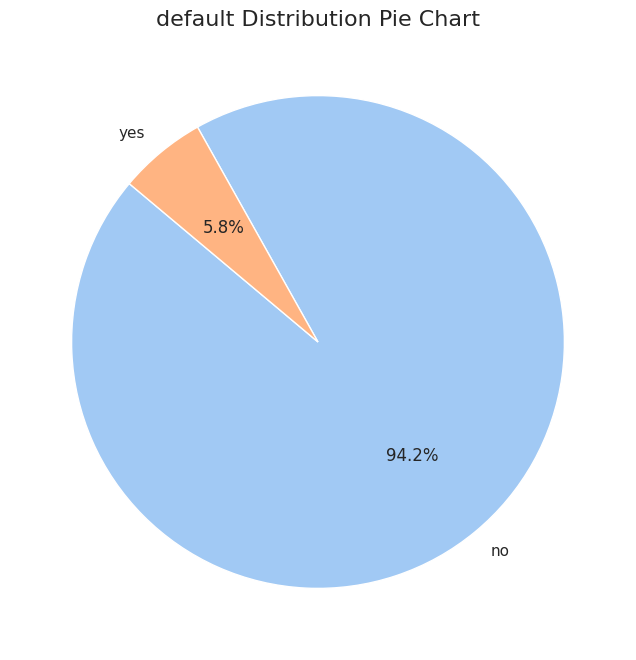

In [36]:
plt.figure(figsize=(8, 8))
default_percentage.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('default Distribution Pie Chart', fontsize=16)
plt.ylabel('')
plt.show()

5.8% of individuals are in default ("yes").


94.2% of individuals are not in default ("no").

## Balance

In [37]:
df_train.balance.head()


0     647
1     553
2    1397
3     394
4     137
Name: balance, dtype: int64

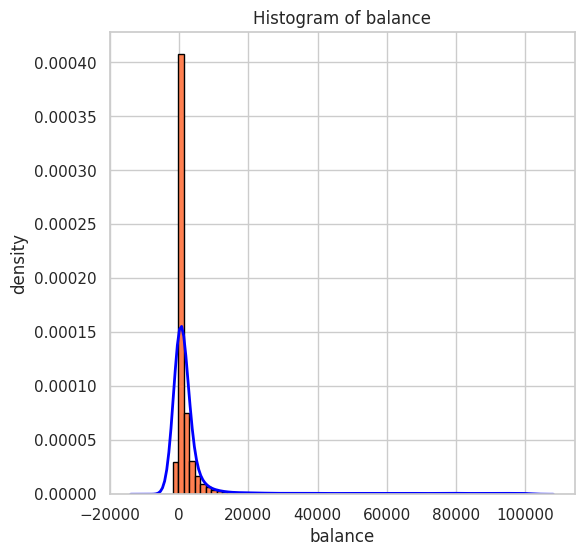

In [38]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(6, 6))


plt.hist(df_train['balance'], bins=70, color='coral', edgecolor='black', density=True)


sns.kdeplot(df_train['balance'], color='blue', linewidth=2)


plt.title("Histogram of balance")
plt.xlabel("balance")
plt.ylabel("density")
plt.grid(True)

plt.show()

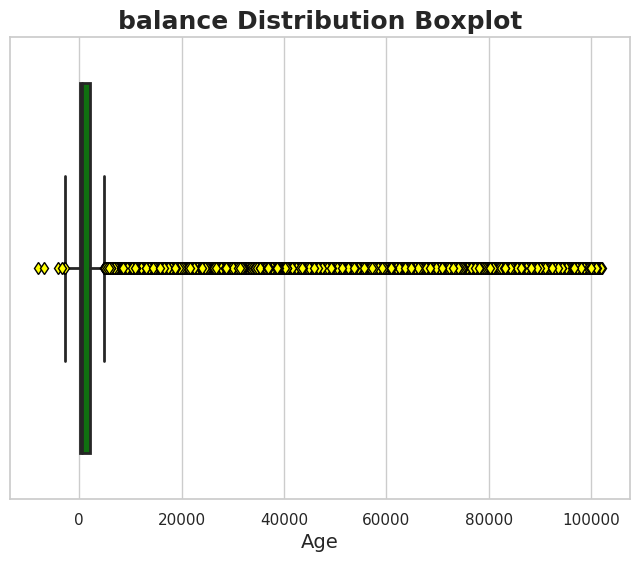

In [39]:
sns.set_style("whitegrid")

plt.figure(figsize=(8, 6))

sns.boxplot(data=df_train, x='balance',
            color='green', 
            linewidth=2, 
            fliersize=6, 
            flierprops={'markerfacecolor': 'yellow', 'markeredgecolor': 'black'})

plt.title("balance Distribution Boxplot", fontsize=18, 
          fontweight='bold')
plt.xlabel("Age", fontsize=14)

plt.show()

Both graphs indicate that the dataset is heavily skewed, with most values being small or near zero, but with significant outliers that stretch far into higher values. This could suggest a financial dataset where most individuals or entities are within normal range, but a few are experiencing extreme conditions (e.g., large debts or high balances).

## housing

In [40]:
housing_percentage = df_train.housing.value_counts()/len(df_train)*100
housing_percentage

housing
yes    55.23195
no     44.76805
Name: count, dtype: float64

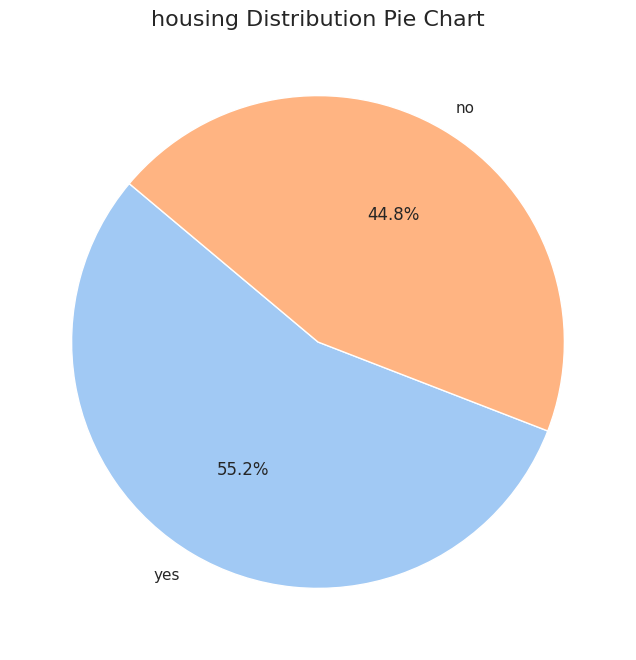

In [41]:
plt.figure(figsize=(8, 8))
housing_percentage.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('housing Distribution Pie Chart', fontsize=16)
plt.ylabel('')
plt.show()


The data shows that 52.2% of people have housing loans, indicating that homeownership is relatively common but not universal. With 44.8% of people not having a housing loan, there remains a significant potential market for financial institutions to target.

## loan

In [42]:
loan_percentage= df_train.loan.value_counts()/len(df_train)*100
loan_percentage

loan
no     81.150698
yes    18.849302
Name: count, dtype: float64

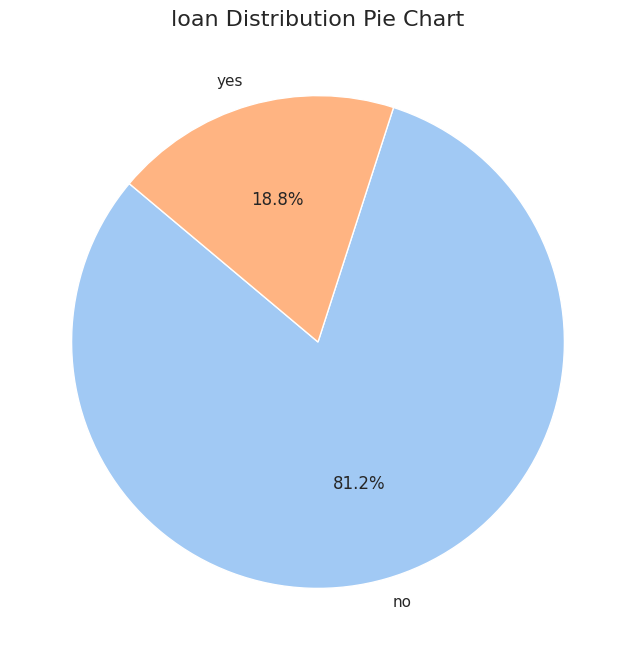

In [43]:
plt.figure(figsize=(8, 8))
loan_percentage.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('loan Distribution Pie Chart', fontsize=16)
plt.ylabel('')
plt.show()

The data reveals that 81.2% of people don't have personal loans, The remaining 18.8% have personal loans represent a smaller, potentially less debt-burdened segment.

## contact

In [44]:
contact = df_train.contact.value_counts()
contact

contact
cellular     25030
telephone     3845
Name: count, dtype: int64

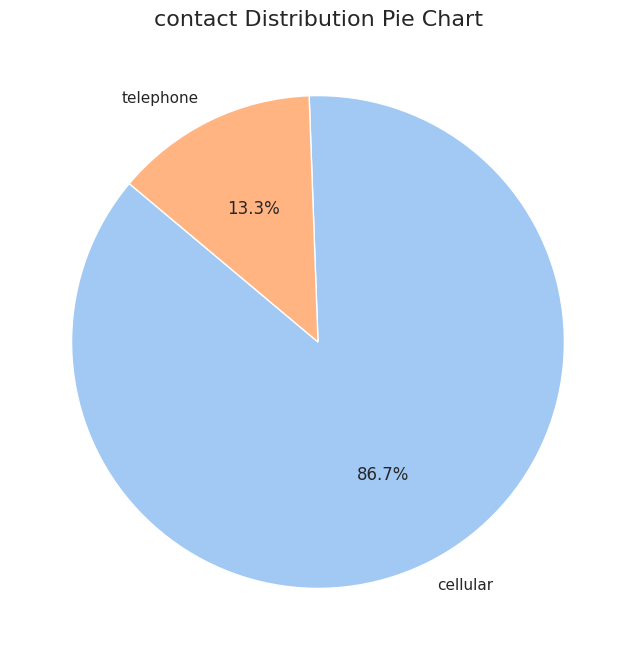

In [45]:
plt.figure(figsize=(8, 8))
contact.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('contact Distribution Pie Chart', fontsize=16)
plt.ylabel('')
plt.show()

The data shows that 86.7% of people use cellular communication, indicating a clear preference for mobile technology. The remaining 13.3% relying on traditional telephone lines reflects a smaller, potentially older or less mobile-connected group.

## duration

In [46]:
duration = df_train.duration.head()
duration

0    357
1    160
2    326
3    104
4    445
Name: duration, dtype: int64

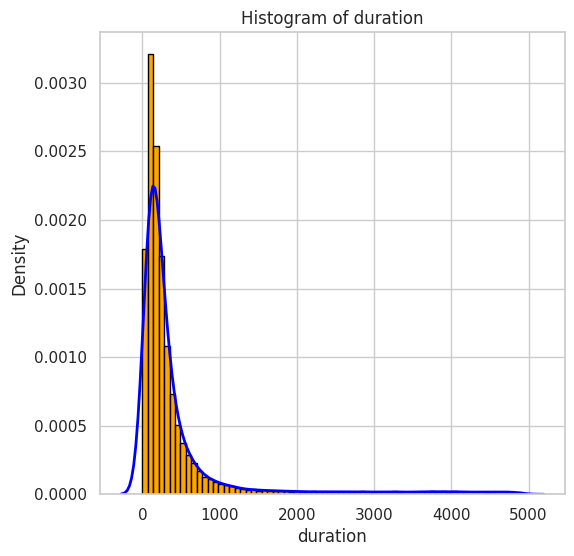

In [47]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(6, 6))


plt.hist(df_train['duration'], bins=70, color='orange', edgecolor='black', density=True)

sns.kdeplot(df_train['duration'], color='blue', linewidth=2)

plt.title("Histogram of duration")
plt.xlabel("duration")
plt.ylabel("Density")
plt.grid(True)

plt.show()

Most of the values are concentrated near the lower end (closer to 0), with a long tail extending toward higher values.
Insight:
The majority of durations are short, but there are a few instances with significantly longer durations.
The right tail (values beyond 1000 and above) suggests the presence of outliers or extreme values.


## last contact date

In [48]:
df_train['last contact date'].head()

0    2009-04-17
1    2009-10-11
2    2010-11-20
3    2009-09-01
4    2008-01-29
Name: last contact date, dtype: object

In [49]:
df_train['last contact date'] = pd.to_datetime(df_train['last contact date'])

df_train = df_train.assign(
    year=df_train['last contact date'].dt.year,
    month=df_train['last contact date'].dt.month,
    weekday=df_train['last contact date'].dt.weekday
)


In [50]:
df_test['last contact date'] = pd.to_datetime(df_test['last contact date'])

df_test = df_test.assign(
    year=df_test['last contact date'].dt.year,
    month=df_test['last contact date'].dt.month,
    weekday=df_test['last contact date'].dt.weekday
)


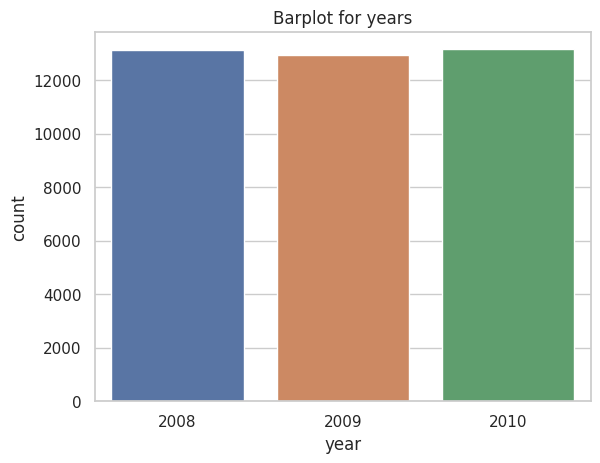

In [51]:
sns.countplot(data=df_train, x='year', order=sorted(df_train['year'].unique()))

plt.title("Barplot for years")
plt.show()


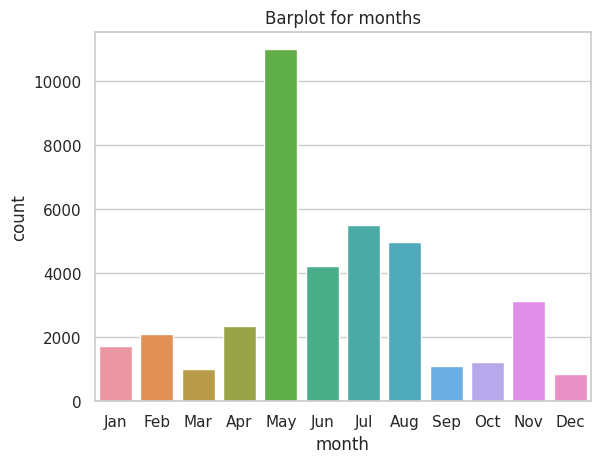

In [52]:
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

sns.countplot(data=df_train, x='month', order=range(1, 13))

plt.xticks(ticks=range(12), labels=month_labels)

plt.title("Barplot for months")
plt.show()


*order=range(1, 13)* ensures that the months are plotted in the correct order.


*plt.xticks()* is used to label the x-axis with custom month names (Jan, Feb, etc.).

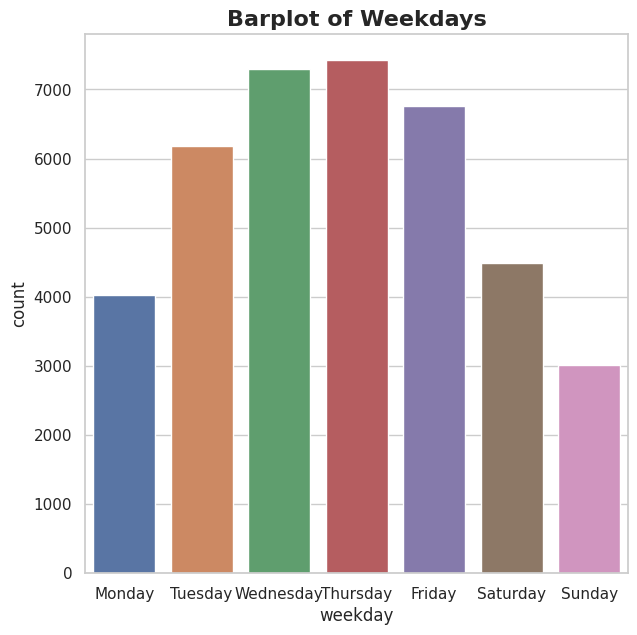

In [53]:
#numerical values to day names (assuming 0 = Monday, 6 = Sunday)
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(7, 7))
sns.countplot(data=df_train, x='weekday', order=range(7))

plt.xticks(ticks=range(7), labels=day_names)

plt.title("Barplot of Weekdays", fontsize=16, fontweight='bold')

plt.show()


*Year-wise Barplot:* The marketing campaigns were fairly consistent across 2008, 2009, and 2010, with slightly more contacts made in 2008. There was no drastic year-over-year fluctuation in the data.


*Month-wise Barplot:* May saw a significant spike in campaign activities compared to other months, suggesting that it might be the peak period for the bank's marketing efforts, possibly aligning with a specific promotional strategy.


*Weekday-wise Barplot:* Wednesday and Thursday had the highest number of calls, indicating that mid-week might be the most active period for campaign outreach. Fewer calls were made over the weekend.

 # pdays

In [54]:
df_train.pdays.head()

0    331
1     -1
2     -1
3     -1
4     -1
Name: pdays, dtype: int64

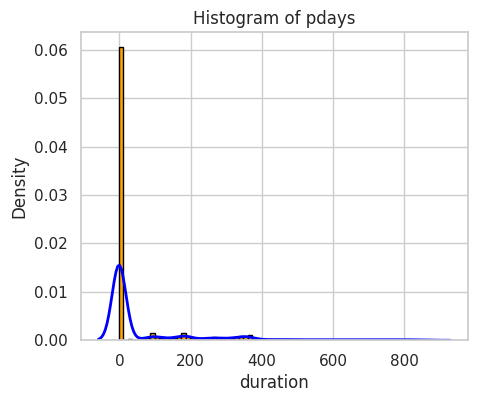

In [55]:
plt.figure(figsize=(5, 4))


plt.hist(df_train['pdays'], bins=70, color='orange', edgecolor='black', density=True)

sns.kdeplot(df_train['pdays'], color='blue', linewidth=2)

plt.title("Histogram of pdays")
plt.xlabel("duration")
plt.ylabel("Density")
plt.grid(True)

plt.show()

we observe that a significant majority of the clients had not been contacted in previous campaigns, as indicated by the spike at 0 or close to it. There are very few instances of clients being contacted after long periods, suggesting that most clients either hadn't been contacted before or were recently engaged in previous campaigns.

# poutcome

In [56]:
df_train.poutcome.value_counts()

poutcome
failure    4949
other      2560
success    2251
Name: count, dtype: int64

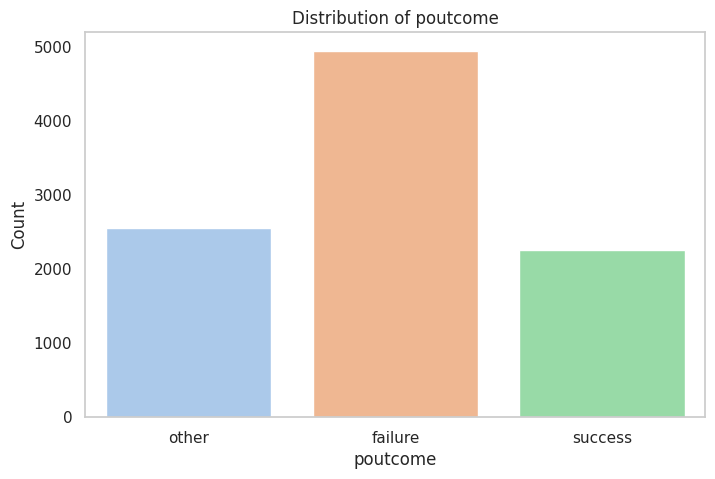

In [57]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_train, x='poutcome', palette='pastel')
plt.title('Distribution of poutcome')
plt.xlabel('poutcome')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()



The data for poutcome (previous campaign outcome) shows that the majority of previous marketing efforts resulted in failure (4949 instances), with a much smaller portion leading to success (2251 instances). This suggests that the bank's past marketing strategies were less effective overall, but there were still some notable successful engagements.

# Target

In [58]:
target = df_train.target.value_counts()/len(df_train)*100
#target

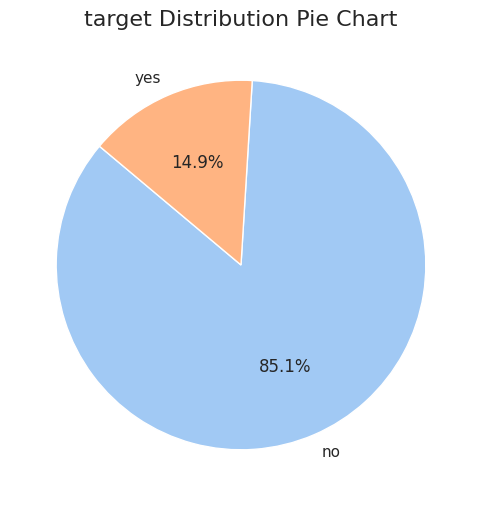

In [59]:
plt.figure(figsize=(6, 6))
target.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('target Distribution Pie Chart', fontsize=16)
plt.ylabel('')
plt.show()

The target data indicates that only 14.86% of clients subscribed to a term deposit, while the overwhelming majority (85.14%) did not. This suggests that the bank's direct marketing campaign had a relatively low success rate in convincing clients to subscribe to the term deposit.

## MULTIVARIATE ANALYSIS

In [60]:
df_train.columns

Index(['last contact date', 'age', 'job', 'marital', 'education', 'default',
       'balance', 'housing', 'loan', 'contact', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'target', 'year', 'month', 'weekday'],
      dtype='object')

**Effect of age on target column**

In [61]:
df_train['age_category'] = df_train['age'].apply(lambda x: 'young' if x < 30 else ('middle' if x <= 50 else 'old'))
#df_train

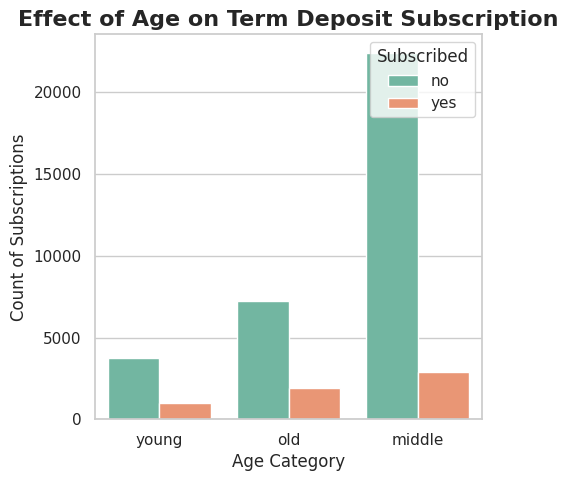

In [62]:
plt.figure(figsize=(5, 5))
sns.countplot(data=df_train, x='age_category', hue='target', palette='Set2')


plt.title("Effect of Age on Term Deposit Subscription", fontsize=16, fontweight='bold')
plt.xlabel("Age Category")
plt.ylabel("Count of Subscriptions")
plt.legend(title='Subscribed', loc='upper right')

plt.show()



From the graph, we observe that the middle-aged group has the highest count of both subscriptions (no and yes), but a much larger proportion of them do not subscribe to the term deposit. The young and old categories have relatively fewer total clients, but the subscription rates for these groups appear more evenly distributed compared to the middle-aged group.

In [63]:
df_train.job.value_counts()

job
blue-collar      7776
management       7462
technician       6078
admin.           4116
services         3325
self-employed    1862
retired          1824
entrepreneur     1805
unemployed       1685
housemaid        1656
student          1393
Name: count, dtype: int64

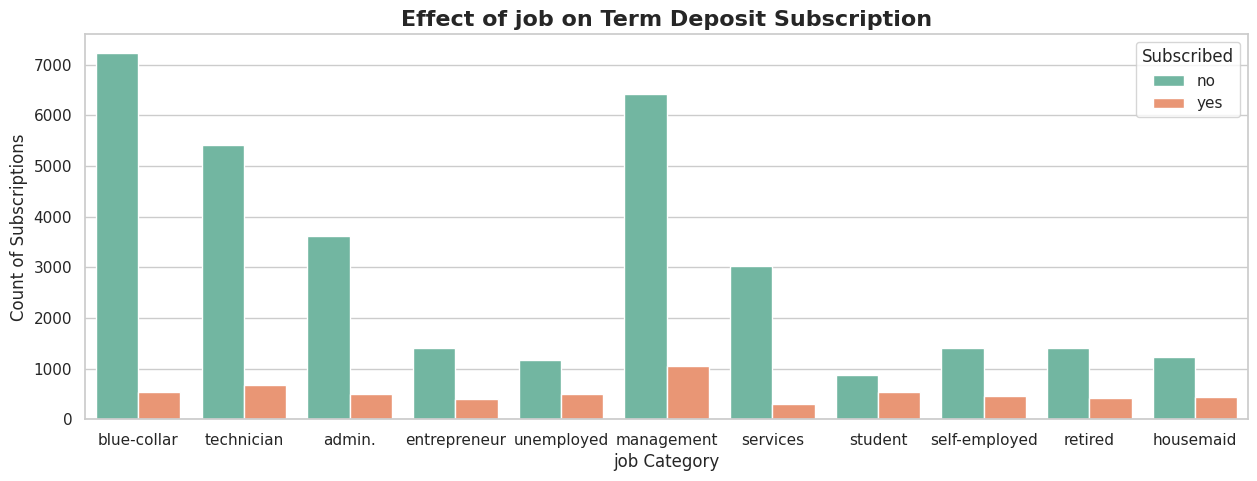

In [64]:

plt.figure(figsize=(15, 5))
sns.countplot(data=df_train, x='job', hue='target', palette='Set2')


plt.title("Effect of job on Term Deposit Subscription", fontsize=16, fontweight='bold')
plt.xlabel("job Category")
plt.ylabel("Count of Subscriptions")
plt.legend(title='Subscribed', loc='upper right')

plt.show()


From the graph, we can see that job categories like "management," "blue-collar," and "technician" have the highest number of clients who did not subscribe to the term deposit. However, the subscription rate seems relatively higher among "students," "retired," and "self-employed" categories, indicating these groups might be more inclined to subscribe to term deposits.

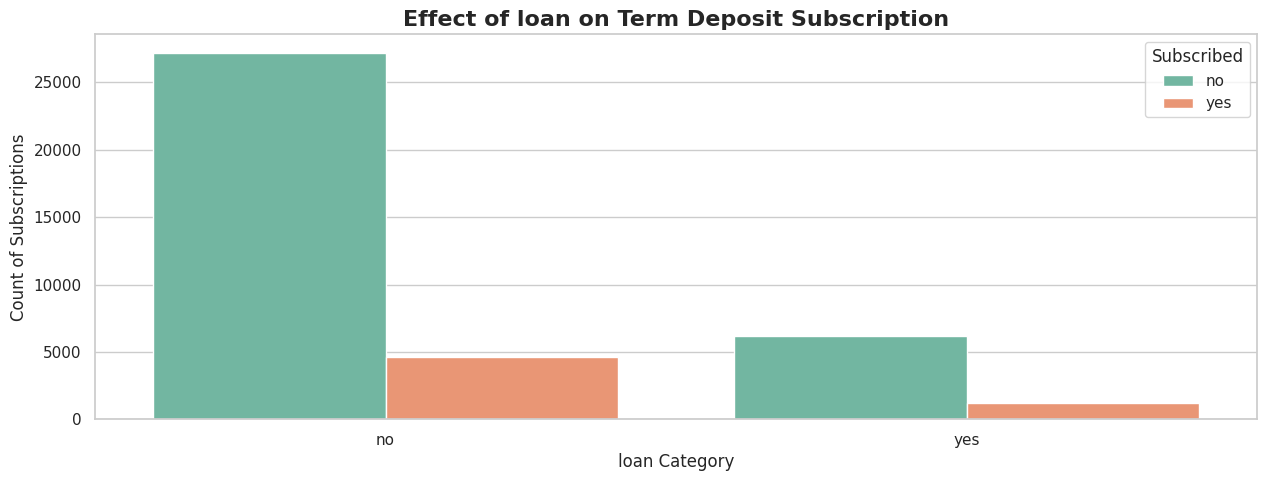

In [65]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df_train, x='loan', hue='target', palette='Set2')


plt.title("Effect of loan on Term Deposit Subscription", fontsize=16, fontweight='bold')
plt.xlabel("loan Category")
plt.ylabel("Count of Subscriptions")
plt.legend(title='Subscribed', loc='upper right')

plt.show()


The graph shows that a significantly higher number of customers who do not have a loan subscribed to term deposits compared to those with a loan. Additionally, customers with a loan are less likely to subscribe, indicating that having a loan may negatively impact the likelihood of term deposit subscription.

## num-num
**Effect of age on balance**

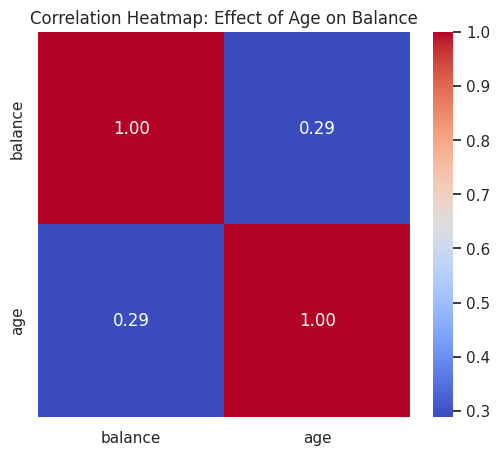

In [66]:
corr = df_train[['balance', 'age']].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Effect of Age on Balance')
plt.show()


The heatmap shows a low positive correlation (0.29) between age and balance, indicating that as age increases, there is a slight tendency for the account balance to increase. However, the relationship is not particularly strong.

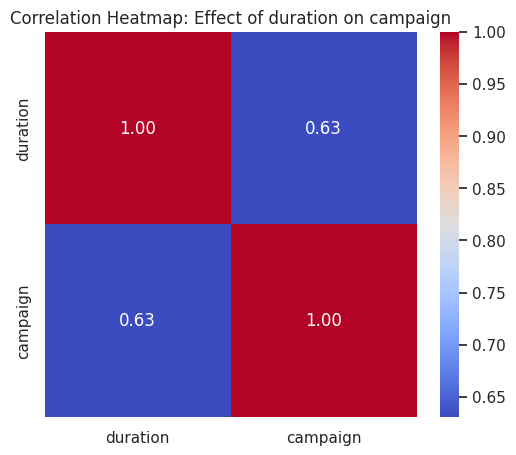

In [67]:
corr = df_train[['duration', 'campaign']].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Effect of duration on campaign')
plt.show()



The heatmap shows a moderate positive correlation (0.63) between the duration of the call and the number of campaigns. This suggests that longer call durations are somewhat associated with a higher number of campaign contacts made to the customer.

# Categorical vs Numerical
**Effect of age_category on balance**

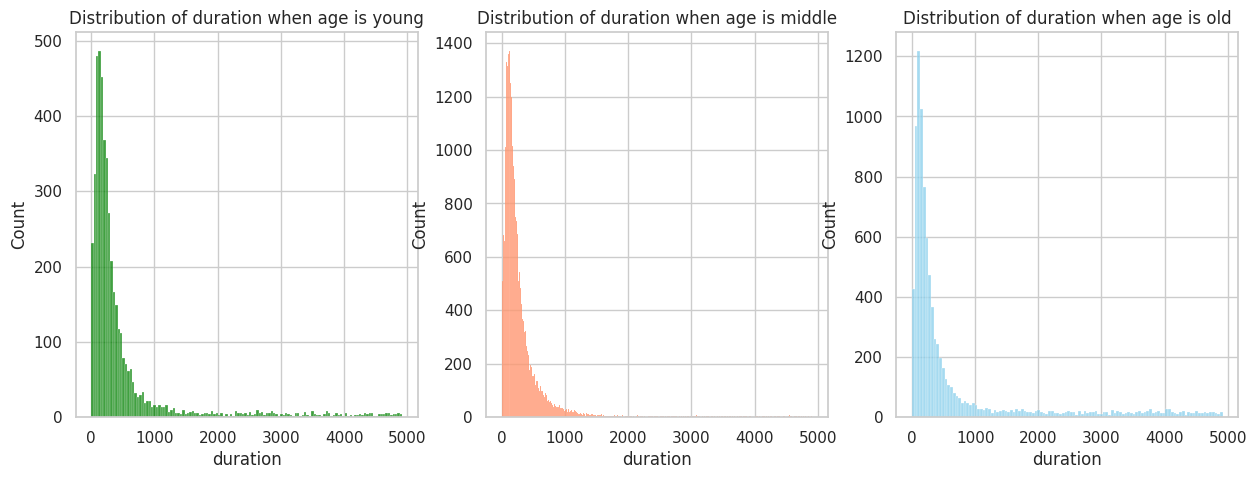

In [68]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5))

sns.histplot(df_train[df_train['age_category']=='young']['duration'],ax=axes[0],color='green')
axes[0].set_title("Distribution of duration when age is young")

sns.histplot(df_train[df_train['age_category']=='middle']['duration'],ax=axes[1],color='coral')
axes[1].set_title("Distribution of duration when age is middle")


sns.histplot(df_train[df_train['age_category']=='old']['duration'],ax=axes[2],color='skyblue')
axes[2].set_title("Distribution of duration when age is old")

plt.show()

The duration distribution across all age groups shows a right-skewed pattern, with the majority earning low amounts and a few outliers with higher incomes. The middle-aged group has the highest frequency at lower income levels, while the distribution widens slightly as age increases.

## Preprocessing method 1
which i used earlier but not getting score to clear the cutoff

**Droping the columns**

In [69]:
df_train = df_train.drop(columns=['last contact date', 'age_category'])
df_train

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target,year,month,weekday
0,26,blue-collar,married,secondary,no,647,yes,no,cellular,357,2,331,1,other,no,2009,4,4
1,52,technician,married,secondary,no,553,yes,no,telephone,160,1,-1,0,NaN,no,2009,10,6
2,44,blue-collar,married,secondary,no,1397,no,no,cellular,326,1,-1,0,NaN,no,2010,11,5
3,33,admin.,married,secondary,no,394,yes,no,telephone,104,3,-1,0,NaN,no,2009,9,1
4,31,entrepreneur,single,tertiary,no,137,no,no,cellular,445,2,-1,0,NaN,no,2008,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39206,31,technician,single,secondary,no,0,yes,no,cellular,16,34,-1,0,NaN,no,2008,7,3
39207,59,admin.,married,primary,no,6187,no,no,cellular,114,4,-1,0,NaN,no,2009,7,4
39208,36,blue-collar,married,secondary,no,63,yes,no,NaN,56,8,-1,0,NaN,no,2008,6,0
39209,28,student,single,secondary,no,5916,no,no,cellular,93,5,-1,0,NaN,no,2010,3,5


In [70]:
df_test = df_test.drop(columns=['last contact date'])
df_test

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target,year,month,weekday
0,36,management,single,tertiary,no,7,no,no,NaN,20,1,-1,0,NaN,None,2009,11,5
1,30,unemployed,married,tertiary,no,1067,no,no,cellular,78,2,-1,0,NaN,None,2010,2,3
2,32,blue-collar,single,secondary,no,82,yes,no,cellular,86,4,-1,0,NaN,None,2010,7,2
3,38,admin.,married,primary,no,1487,no,no,NaN,332,2,-1,0,NaN,None,2010,6,2
4,59,management,married,tertiary,no,315,no,no,cellular,591,1,176,2,failure,None,2008,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,38,management,single,tertiary,no,8953,no,yes,cellular,301,1,-1,0,NaN,None,2010,11,5
9996,26,admin.,single,secondary,no,317,yes,no,NaN,953,1,-1,0,NaN,None,2009,6,2
9997,26,technician,single,secondary,no,181,no,no,cellular,158,2,-1,0,NaN,None,2010,4,1
9998,32,management,single,tertiary,no,312,no,no,cellular,232,2,-1,0,NaN,None,2010,2,2


**Define the X and Y variable**

In [71]:
X = df_train.loc[:, df_train.columns != 'target']
y = df_train.loc[:, 'target']

In [72]:
df_test = df_test.drop(columns=['target'])

**Train and validation set**

In [73]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [74]:
y_val.groupby(y_val).size()


target
no     6677
yes    1166
Name: target, dtype: int64

In [75]:
df_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'target', 'year', 'month', 'weekday'],
      dtype='object')

In [76]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        39211 non-null  int64 
 1   job        38982 non-null  object
 2   marital    39211 non-null  object
 3   education  37744 non-null  object
 4   default    39211 non-null  object
 5   balance    39211 non-null  int64 
 6   housing    39211 non-null  object
 7   loan       39211 non-null  object
 8   contact    28875 non-null  object
 9   duration   39211 non-null  int64 
 10  campaign   39211 non-null  int64 
 11  pdays      39211 non-null  int64 
 12  previous   39211 non-null  int64 
 13  poutcome   9760 non-null   object
 14  target     39211 non-null  object
 15  year       39211 non-null  int32 
 16  month      39211 non-null  int32 
 17  weekday    39211 non-null  int32 
dtypes: int32(3), int64(6), object(9)
memory usage: 4.9+ MB


**making pipeline**

In [77]:
num = X.select_dtypes(include='number').columns
cat = X.select_dtypes(exclude='number').columns


In [78]:
# num_pipe = Pipeline([
#     ('imputer', SimpleImputer(strategy = 'mean')),
#     ('scaler', StandardScaler())
# ])
# num_pipe
# cat_pipe = Pipeline([
#     ('imputer', SimpleImputer(strategy = 'most_frequent')),
#     ('encoder', OneHotEncoder(handle_unknown = 'ignore'))
# ])
# cat_pipe
# preprocessor = Pipeline(steps=[
#     ('transformer', ColumnTransformer(
#         transformers=[
#             ('numerical', num_pipe, num),
#             ('categorical', cat_pipe, cat)
#         ]
#     ))
# ])
# preprocessor
#X_train
# X_train_transformed = preprocessor.fit_transform(X_train)
# X_val_transformed = preprocessor.transform(X_val)
# df_test_transformed = preprocessor.transform(df_test)
# X_train_transformed = pd.DataFrame(X_train_transformed)
# X_train_transformed
# X_val_transformed = pd.DataFrame(X_val_transformed)
# X_val_transformed
# df_test_transformed = pd.DataFrame(df_test_transformed)
# df_test_transformed

Transforming the numpy array back into a DataFrame.

In [79]:
columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'year', 'poutcome']


## Feature Engineering

 **Convert categorical column to numerical column**

In [80]:
encoder_dict = {col: LabelEncoder().fit(X_train[col]) for col in columns}

for col, enc in encoder_dict.items():
    X_train[col] = enc.transform(X_train[col])
    X_val[col] = enc.transform(X_val[col])
    


In [81]:
for col, enc in encoder_dict.items():
    df_test[col] = enc.transform(df_test[col])


In [82]:
imputer = IterativeImputer()

X_train, X_val = [pd.DataFrame(imputer.fit_transform(X), columns=X.columns) for X in [X_train, X_val]]

In [83]:
df_test = pd.DataFrame(imputer.transform(df_test), columns=df_test.columns)


## label encoding

In [84]:
label = LabelEncoder()

y_train, y_val = [label.fit_transform(y) if y is y_train else label.transform(y) for y in [y_train, y_val]]


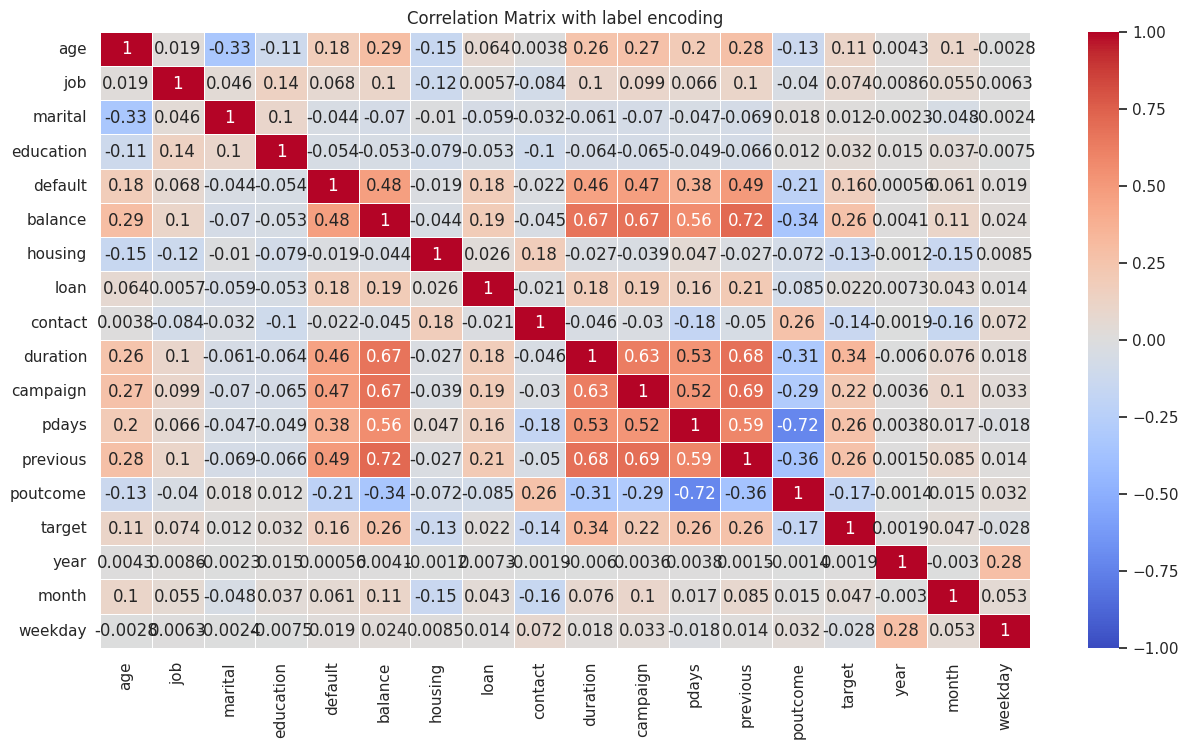

In [85]:
encoded_df = df_train.copy()
categorical_columns = df_train.select_dtypes(include=['object']).columns.tolist()
label_encoder = LabelEncoder()

for col in categorical_columns:
    encoded_df[col]= label_encoder.fit_transform(encoded_df[col])

corr_matrix = encoded_df.corr()

plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix,annot = True,cmap= 'coolwarm',vmin= -1, vmax = 1, linewidths= 0.5)
plt.title('Correlation Matrix with label encoding')
plt.show()

**Strong Positive Correlations:**

*balance and previous* (0.72): People with higher balances tend to have more previous contacts. This might indicate that clients with higher balances are contacted multiple times or are more receptive to follow-up campaigns.


*duration and balance* (0.68): This means that clients who have longer call durations have high balance


*previous and campagins*(0.69): There’s a strong relationship between the number of previous contacts and the campagins

**Strong Negative Correlations:**

*poutcome and pdays* (-0.72): There’s a strong negative correlation between the outcome of a previous campaign and the number of days since the client was last contacted, suggesting that a recent contact often follows a successful campaign outcome.

*poutcome and balance* (-0.34): Clients with a positive outcome from a previous campaign tend to have lower balances. This could imply that the campaign is more successful with clients who may not have high balances.


**Target Variable Correlations:**

*target and duration* (0.34): The target variable has a moderate positive correlation with the duration of contact, meaning longer calls might be associated with a higher likelihood of achieving the target outcome.


*target and previous* (0.26): There’s a moderate positive correlation between the target variable and the number of previous contacts, indicating that repeated contact might be beneficial in achieving the target.


**Other Notable Insights:**

*age and marital* (-0.33): There’s a negative correlation between age and marital status, which could mean that younger individuals are less likely to be married, a common demographic trend.


*job and marital* (0.46): Job type and marital status have a moderate positive correlation, suggesting that marital status may impact job type, or vice versa.



**Preprocessing method 2**

In [86]:
categorical_col = ['job','marital','education','default','housing','loan','contact','poutcome','weekday']
numerical_col = ['age','balance','duration','pdays','previous']

In [87]:
transformer = make_column_transformer(
    (StandardScaler(), numerical_col),
    (OneHotEncoder(handle_unknown = "ignore"), categorical_col),
    remainder='passthrough'
)

In [88]:
X_train_transformed = transformer.fit(X_train).transform(X_train)
X_val_transformed = transformer.transform(X_val)
df_test_transformed = transformer.transform(df_test)

The make_column_transformer function is a simplified way to create a ColumnTransformer without explicitly naming the transformers.



## Feature selection methods

# Select k best

In [89]:
# print((X_train < 0).any().any())  
# print((X_val < 0).any().any())    
# print((df_test< 0).any().any())

  **This will return True if there are any negative  value in X_train  
  This will return True if there are any negative in X_val** 

In [90]:
# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_val_scaled = scaler.transform(X_val)

# selector = SelectKBest(score_func=chi2, k=10)
# X_selected_train = pd.DataFrame(selector.fit_transform(X_train_scaled, y_train), 
#                                  columns=X_train.columns[selector.get_support()])
# X_selected_val = pd.DataFrame(selector.transform(X_val_scaled), 
#                                columns=X_train.columns[selector.get_support()])


In [91]:
# df_test_scaled = scaler.transform(df_test)

# df_selected_test = pd.DataFrame(selector.transform(df_test_scaled), 
#                                columns=X_train.columns[selector.get_support()])


# RFE

In [92]:
# model = LogisticRegression(max_iter=100, solver='saga',random_state=0)

# selector = SelectFromModel(estimator=model, max_features=9)
# selector.fit(X_train, y_train)

# X_selected_train = selector.transform(X_train)
# X_selected_val = selector.transform(X_val)
# df_selected_test = selector.transform(df_test)

# selected_features = X_train.columns[selector.get_support()]





In [93]:
# df_selected_test = selector.transform(df_test)

# selected_features = X_train.columns[selector.get_support()]


from this above feature engineering steps m not able to cross the cutof

## Dimensionality Reduction   **PCA**

In [94]:
# pca = PCA(n_components=30)

# X_train_reduced_pca, X_val_reduced_pca = pca.fit(X_train_transformed).transform(X_train_transformed), pca.transform(X_val_transformed)
# df_test_reduced_pca = pca.transform(df_test_transformed)


In [95]:
# X_train_pca = pd.DataFrame(X_train_reduced_pca)
# X_val_pca = pd.DataFrame(X_val_reduced_pca)
# df_test_pca = pd.DataFrame(df_test_reduced_pca)

# SVD (singular value decomposition)

In [96]:
# svd = TruncatedSVD(n_components=30)
# X_train_reduced_svd = pd.DataFrame(svd.fit_transform(X_train_transformed), columns=[f'SVD{i+1}' for i in range(30)])
# X_val_reduced_svd = pd.DataFrame(svd.transform(X_val_transformed), columns=[f'SVD{i+1}' for i in range(30)])
# df_test_reduced_svd = pd.DataFrame(svd.transform(df_test_transformed), columns=[f'SVD{i+1}' for i in range(30)])


So, columns=[f'SVD{i+1}' for i in range(30)] dynamically creates a list of column names for the DataFrame with 30 components, each prefixed by "SVD" followed by its component number.








In [97]:
# X_train_svd = pd.DataFrame(X_train_reduced_svd)
# X_val_svd = pd.DataFrame(X_val_reduced_svd)
# df_test_svd = pd.DataFrame(df_test_reduced_svd)

## Model tranning

**LOGISTIC REGRESSION**

Accuracy: 0.8137
              precision    recall  f1-score   support

           0       0.94      0.83      0.88      6677
           1       0.42      0.70      0.53      1166

    accuracy                           0.81      7843
   macro avg       0.68      0.77      0.71      7843
weighted avg       0.86      0.81      0.83      7843



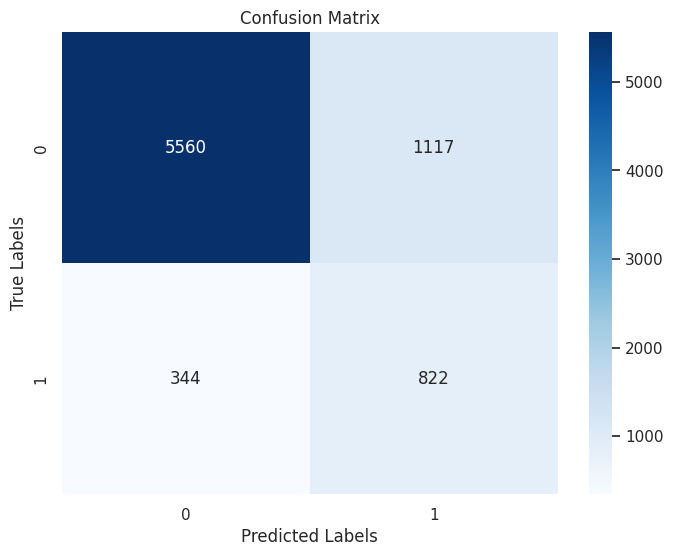

In [98]:
model1 = LogisticRegression(class_weight = 'balanced', max_iter = 1000, random_state = 0)
model1.fit(X_train_transformed, y_train)  

y_pred = model1.predict(X_val_transformed)

accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy:.4f}')
y_pred = model1.predict(X_val_transformed)
print(classification_report(y_val,y_pred))

cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model1.classes_, yticklabels=model1.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


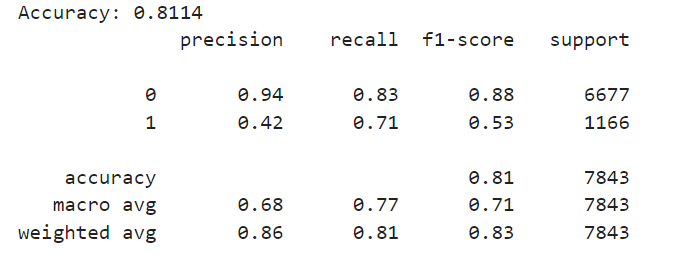

In [99]:
X_val_transformed.shape


(7843, 47)

In [100]:
# model1 = LogisticRegression(class_weight = 'balanced', max_iter = 1000, random_state = 0)
# model1.fit(X_train_pca, y_train)  

# y_pred = model1.predict(X_val_pca)

# accuracy = accuracy_score(y_val, y_pred)
# print(f'Accuracy: {accuracy:.4f}')
# y_pred = model1.predict(X_val_pca)
# print(classification_report(y_val,y_pred))

In [101]:
# model1 = LogisticRegression(class_weight = 'balanced', max_iter = 1000, random_state = 0)
# model1.fit(X_train_svd, y_train)  

# y_pred = model1.predict(X_val_svd)

# accuracy = accuracy_score(y_val, y_pred)
# print(f'Accuracy: {accuracy:.4f}')
# y_pred = model1.predict(X_val_svd)
# print(classification_report(y_val,y_pred))

**SGDCLASSIFIER**

In [102]:
model2 = SGDClassifier()
model2.fit(X_train_transformed, y_train)  

y_pred = model2.predict(X_val_transformed)

accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.8605


              precision    recall  f1-score   support

           0       0.90      0.94      0.92      6677
           1       0.54      0.40      0.46      1166

    accuracy                           0.86      7843
   macro avg       0.72      0.67      0.69      7843
weighted avg       0.85      0.86      0.85      7843



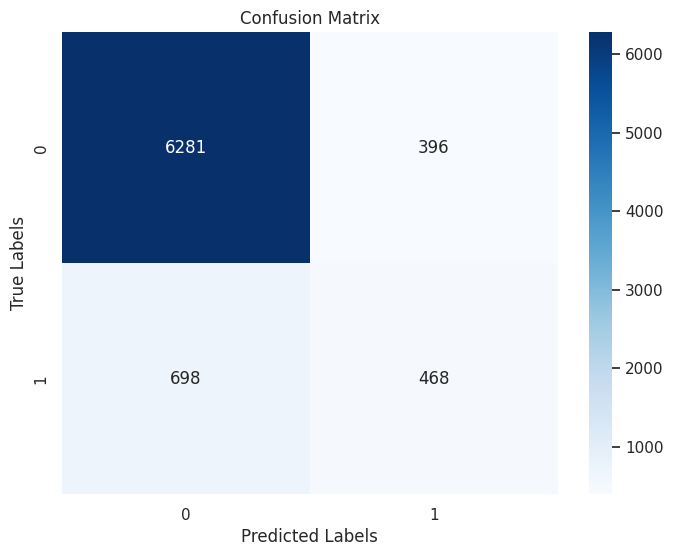

In [103]:
y_pred = model2.predict(X_val_transformed)
print(classification_report(y_val,y_pred))

cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model2.classes_, yticklabels=model2.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [104]:
# model2 = SGDClassifier()
# model2.fit(X_train_pca, y_train)  

# y_pred = model2.predict(X_val_pca)

# accuracy = accuracy_score(y_val, y_pred)
# print(f'Accuracy: {accuracy:.4f}')
# y_pred = model2.predict(X_val_pca)
# print(classification_report(y_val,y_pred))

In [105]:
# model2 = SGDClassifier()
# model2.fit(X_train_svd, y_train)  

# y_pred = model2.predict(X_val_svd)

# accuracy = accuracy_score(y_val, y_pred)
# print(f'Accuracy: {accuracy:.4f}')
# y_pred = model2.predict(X_val_svd)
# print(classification_report(y_val,y_pred))

**RandomForest**

Accuracy: 0.8657
              precision    recall  f1-score   support

           0       0.89      0.97      0.92      6677
           1       0.60      0.29      0.39      1166

    accuracy                           0.87      7843
   macro avg       0.74      0.63      0.66      7843
weighted avg       0.84      0.87      0.84      7843



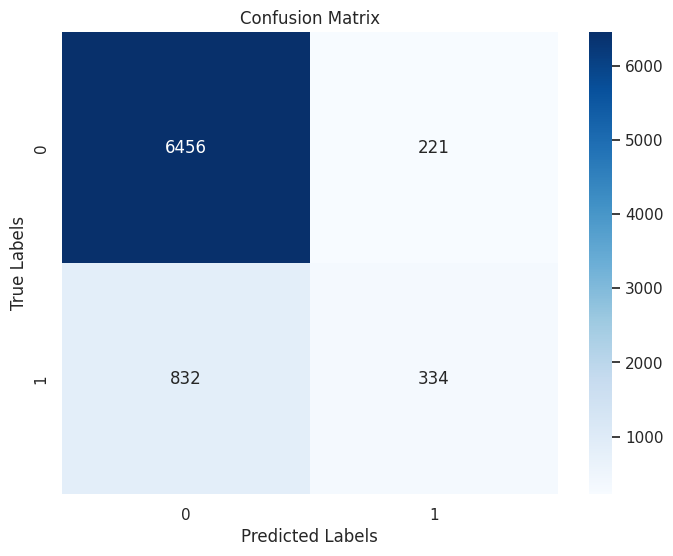

In [106]:
model3 = RandomForestClassifier(class_weight = 'balanced', random_state = 0)
model3.fit(X_train_transformed, y_train)  

y_pred = model3.predict(X_val_transformed)

accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy:.4f}')
y_pred = model3.predict(X_val_transformed)
print(classification_report(y_val,y_pred))

cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model3.classes_, yticklabels=model3.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [107]:
# model3 = RandomForestClassifier(class_weight = 'balanced', random_state = 0)
# model3.fit(X_train_pca, y_train)  

# y_pred = model3.predict(X_val_pca)

# accuracy = accuracy_score(y_val, y_pred)
# print(f'Accuracy: {accuracy:.4f}')
# y_pred = model3.predict(X_val_pca)
# print(classification_report(y_val,y_pred))

In [108]:
# model3 = RandomForestClassifier(class_weight = 'balanced', random_state = 0)
# model3.fit(X_train_svd, y_train)  

# y_pred = model3.predict(X_val_svd)

# accuracy = accuracy_score(y_val, y_pred)
# print(f'Accuracy: {accuracy:.4f}')
# y_pred = model3.predict(X_val_svd)
# print(classification_report(y_val,y_pred))

**SGBOOST**

Accuracy: 0.8652
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      6677
           1       0.54      0.63      0.58      1166

    accuracy                           0.87      7843
   macro avg       0.74      0.77      0.75      7843
weighted avg       0.88      0.87      0.87      7843



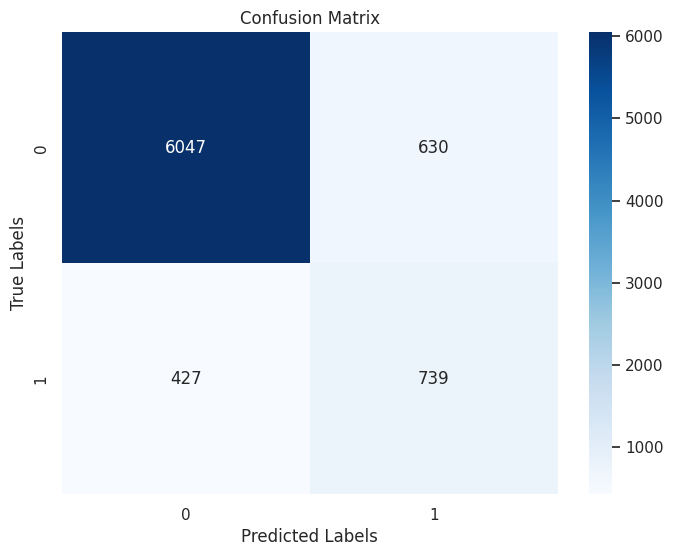

In [109]:
model4 = XGBClassifier(scale_pos_weight = 2)
model4.fit(X_train_transformed, y_train)  

y_pred = model4.predict(X_val_transformed)

accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy:.4f}')
y_pred = model4.predict(X_val_transformed)
print(classification_report(y_val,y_pred))

cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model4.classes_, yticklabels=model4.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

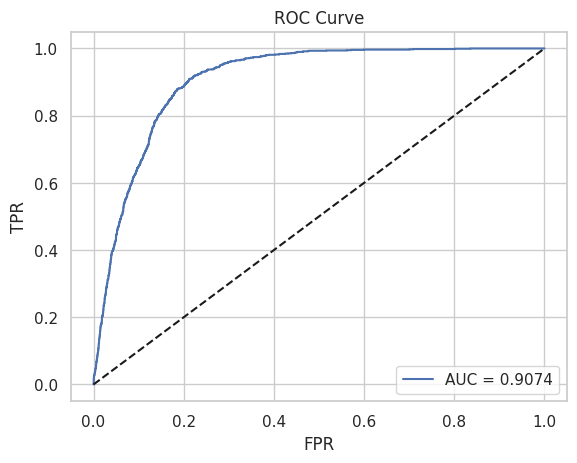

In [110]:
y_proba = model4.predict_proba(X_val_transformed)[:, 1]
fpr, tpr, _ = roc_curve(y_val, y_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.show()


 **AUC Value (0.9074)**

The Area Under the Curve (AUC) is 0.9074, indicating excellent performance of the classifier.
Interpretation:
AUC ranges from 0 to 1:


0.5: Random performance (no discrimination between classes).


1.0: Perfect classifier.


0.9+: The classifier is highly effective in distinguishing between the positive and negative classes.


 **Trade-off Between FPR and TPR**


*True Positive Rate (TPR)*:
Also called recall or sensitivity. Indicates how many of the positive instances are correctly identified.
Higher TPR is desirable.


*False Positive Rate (FPR)*:
Indicates how many of the negative instances are incorrectly classified as positive.
Lower FPR is desirable.
The curve shows the balance:
Initially, the classifier achieves a high TPR with a low FPR.
As FPR increases, TPR eventually saturates, and the model may classify more false positives.

In [111]:
# model4 = XGBClassifier(random_state = 0)
# model4.fit(X_train_pca, y_train)  

# y_pred = model4.predict(X_val_pca)

# accuracy = accuracy_score(y_val, y_pred)
# print(f'Accuracy: {accuracy:.4f}')
# y_pred = model4.predict(X_val_pca)
# print(classification_report(y_val,y_pred))

In [112]:
# model4 = XGBClassifier(random_state = 0)
# model4.fit(X_train_svd, y_train)  

# y_pred = model4.predict(X_val_svd)

# accuracy = accuracy_score(y_val, y_pred)
# print(f'Accuracy: {accuracy:.4f}')
# y_pred = model4.predict(X_val_svd)
# print(classification_report(y_val,y_pred))

**KNN**

In [113]:
model5 = KNeighborsClassifier(n_neighbors=5)
model5.fit(X_train_transformed, y_train)  

y_pred = model5.predict(X_val_transformed)

accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy:.4f}')
y_pred = model5.predict(X_val_transformed)
print(classification_report(y_val,y_pred))

Accuracy: 0.8484
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      6677
           1       0.48      0.25      0.32      1166

    accuracy                           0.85      7843
   macro avg       0.68      0.60      0.62      7843
weighted avg       0.82      0.85      0.83      7843



In [114]:
# model5 = KNeighborsClassifier(n_neighbors=5)
# model5.fit(X_train_pca, y_train)  

# y_pred = model5.predict(X_val_pca)

# accuracy = accuracy_score(y_val, y_pred)
# print(f'Accuracy: {accuracy:.4f}')
# y_pred = model5.predict(X_val_pca)
# print(classification_report(y_val,y_pred))

In [115]:
# model5 = KNeighborsClassifier(n_neighbors=5)
# model5.fit(X_train_svd, y_train)  

# y_pred = model5.predict(X_val_svd)

# accuracy = accuracy_score(y_val, y_pred)
# print(f'Accuracy: {accuracy:.4f}')
# y_pred = model5.predict(X_val_svd)
# print(classification_report(y_val,y_pred))

**LGBMClassifier**

In [116]:
model6 = LGBMClassifier(random_state=0)
model6.fit(X_train_transformed, y_train)  

y_pred = model6.predict(X_val_transformed)

accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy:.4f}')
y_pred = model6.predict(X_val_transformed)
print(classification_report(y_val,y_pred))

[LightGBM] [Info] Number of positive: 4661, number of negative: 26707
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007547 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1246
[LightGBM] [Info] Number of data points in the train set: 31368, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.148591 -> initscore=-1.745696
[LightGBM] [Info] Start training from score -1.745696
Accuracy: 0.8712
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      6677
           1       0.58      0.48      0.52      1166

    accuracy                           0.87      7843
   macro avg       0.75      0.71      0.73      7843
weighted avg       0.86      0.87      0.87      7843



              precision    recall  f1-score   support

           0       0.96      0.87      0.92      6677
           1       0.52      0.79      0.63      1166

    accuracy                           0.86      7843
   macro avg       0.74      0.83      0.77      7843
weighted avg       0.90      0.86      0.87      7843



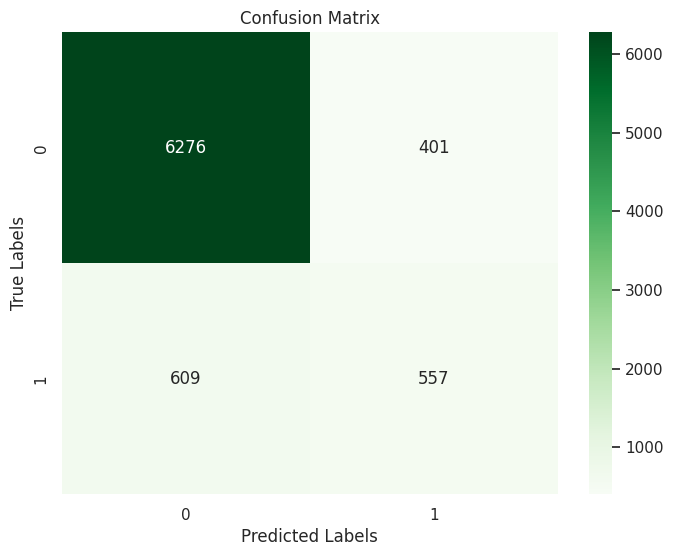

In [117]:
probability = model6.predict_proba(X_val_transformed)
p_proba=probability[:,1]
preds=(p_proba >=0.3).astype(int)
print(classification_report(y_val,preds))

cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=model6.classes_, yticklabels=model6.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

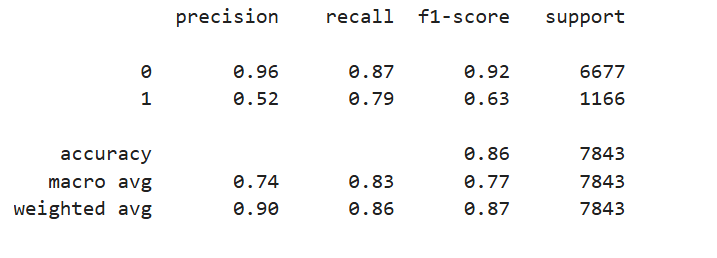

In [118]:
test_proba = model6.predict_proba(df_test_transformed)

p_proba_test = test_proba[:, 1]

preds_test = (p_proba_test >= 0.3).astype(int)

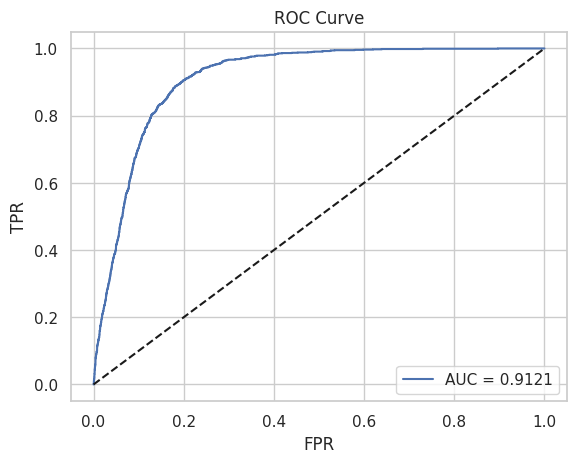

In [119]:
y_proba = model6.predict_proba(X_val_transformed)[:, 1]
fpr, tpr, _ = roc_curve(y_val, y_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [120]:
# model6 = LGBMClassifier(n_neighbors=5)
# model6.fit(X_train_pca, y_train)  

# y_pred = model6.predict(X_val_pca)

# accuracy = accuracy_score(y_val, y_pred)
# print(f'Accuracy: {accuracy:.4f}')
# y_pred = model6.predict(X_val_pca)
# print(classification_report(y_val,y_pred))

In [121]:
# model6 = LGBMClassifier(n_neighbors=5)
# model6.fit(X_train_svd, y_train)  

# y_pred = model6.predict(X_val_svd)

# accuracy = accuracy_score(y_val, y_pred)
# print(f'Accuracy: {accuracy:.4f}')
# y_pred = model6.predict(X_val_svd)
# print(classification_report(y_val,y_pred))

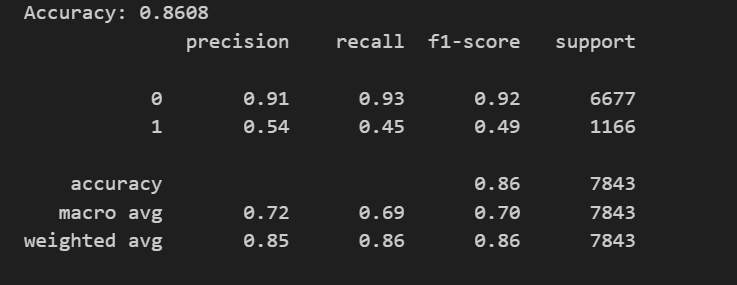

## Stacking classifier

In [122]:
# estimators = [
#     ('lr',LogisticRegression()),
#     ('xgb', XGBClassifier(random_state=0))
# ]

# final_estimator = LGBMClassifier()

# model_7 = StackingClassifier(estimators=estimators, final_estimator=final_estimator, cv=5)

# model_7.fit(X_train_transformed, y_train)

# y_pred = model_7.predict(X_val_transformed)

# accuracy = accuracy_score(y_val, y_pred)
# print(f'Accuracy: {accuracy:.4f}')

# print(classification_report(y_val, y_pred))

# Hyper parameter tunning

In [123]:
# param_grid ={
#     'penalty' : ['l1','l2', 'elasticnet'],
#     'C' : [0.01, 0.1, 1, 10, 100],
#     'solver' : ['liblinear', 'newton-cg']
# }

# model = LogisticRegression(random_state = 42, max_iter = 10000)

# lg_gscv = GridSearchCV(estimator = model,param_grid = param_grid, cv = 5, verbose = 3,n_jobs=-1)
# lg_gscv.fit(X_train_transformed, y_train)

# best_parameters = lg_gscv.best_params_
# y_pred = lg_gscv.predict(X_val_transformed)
# print(best_parameters)
# print(classification_report(y_val, y_pred))

**Best parameters c = 10, penalty = l1, solver = liblinear**
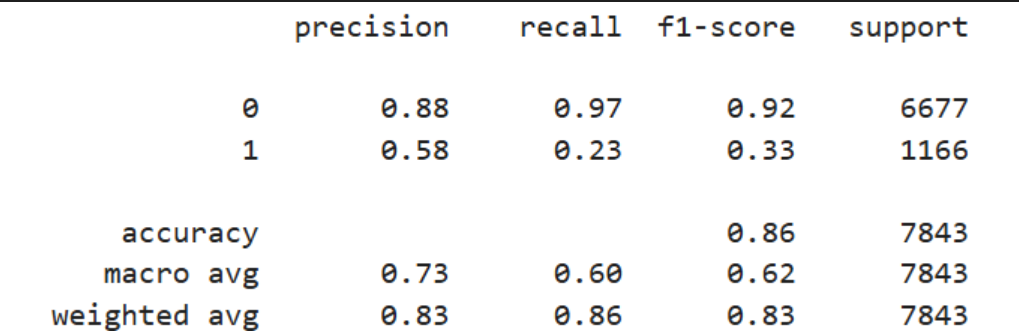

In [124]:
# param_grid = {
#     "max_depth": [-1, 50, 100],
#     "neg_bagging_fraction": [1, 0.25, 0.5, 0.75],
#     "is_unbalance": [True, False],
#     "lambda_l2": [0, 5, 10]
# }

# model = LGBMClassifier()

# lgbm_grid = GridSearchCV(
#     estimator=model, 
#     param_grid=param_grid, 
#     scoring='f1_macro', 
#     cv=3, 
#     verbose=3, 
#     n_jobs=-1
# )

# lgbm_grid.fit(X_train_transformed, y_train)
# y_pred = lgbm_grid.predict(X_val_transformed)
# print(best_parameters)
# print(classification_report(y_val, y_pred))

**Best parameters c = 10, penalty = l1, solver = liblinear**
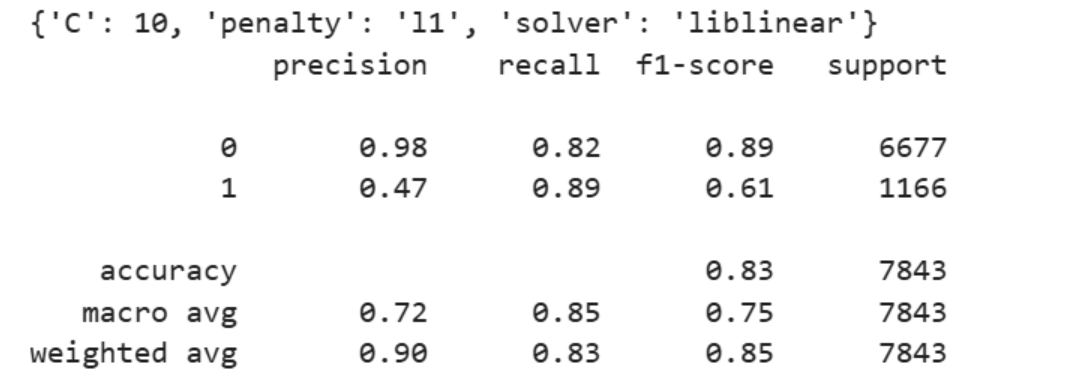

## Xgboost

In [125]:
# param_grid = {
#     'max_depth': range(2, 10, 2),
#     'learning_rate': [0.1, 0.01, 0.05],
#     'n_estimators': [50, 100, 200]
# }

# xgb_model = XGBClassifier(objective='binary:logistic', n_jobs=-1)

# grid_search = GridSearchCV(
#     estimator=xgb_model,
#     param_grid=param_grid,
#     scoring='roc_auc',  
#     cv=3,
#     verbose=2,
#     n_jobs=-1
# )

# grid_search.fit(X_train_transformed, y_train)


# print(f"Best Parameters: {grid_search.best_params_}")
# y_pred = grid_search.best_estimator_.predict(X_val_transformed)

# print("Classification Report:")
# print(classification_report(y_val, y_pred))

learning_rate = 0.1, max_depth = 4, n_estimators = 200
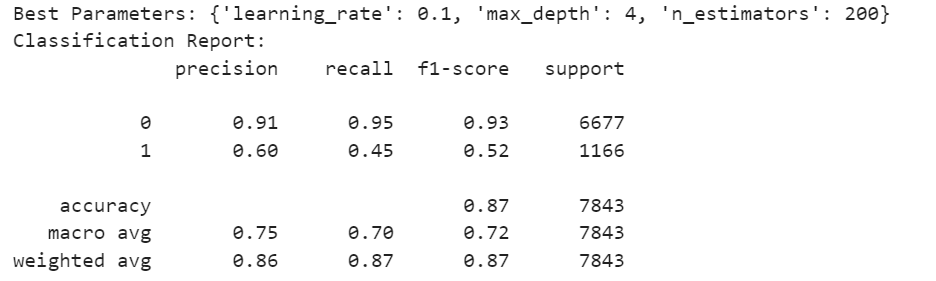

## Model comparison 

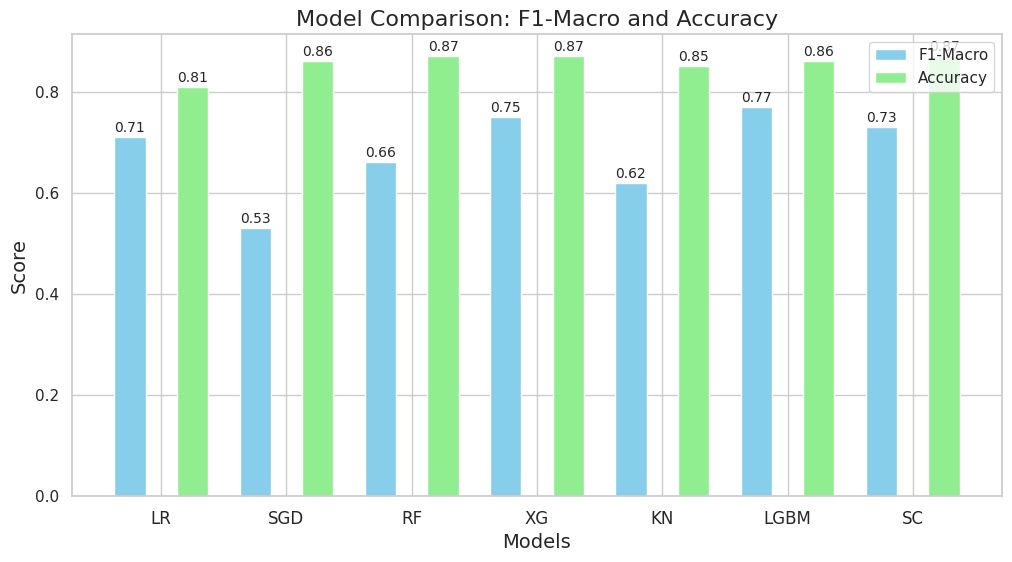

In [126]:
f1_scores = {
    'LR': 0.71,
    'SGD': 0.53,
    'RF': 0.66,
    'XG': 0.75,
    'KN': 0.62,
    'LGBM': 0.77,
    'SC': 0.73
}

accuracies = {
    'LR': 0.81,
    'SGD': 0.86,
    'RF': 0.87,
    'XG': 0.87,
    'KN': 0.85,
    'LGBM': 0.86,
    'SC': 0.87
}

model_names = list(f1_scores.keys())
f1_values = list(f1_scores.values())
accuracy_values = list(accuracies.values())

sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(12, 6))
x = range(len(model_names))
width = 0.25

ax.bar([i - width for i in x], f1_values, width, label='F1-Macro', color='skyblue')
ax.bar([i + width for i in x], accuracy_values, width, label='Accuracy', color='lightgreen')

ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('Score', fontsize=14)
ax.set_title('Model Comparison: F1-Macro and Accuracy', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(model_names, fontsize=12)
ax.legend(loc='best')

for i, (f1, acc) in enumerate(zip(f1_values, accuracy_values)):
    ax.text(i - width, f1 + 0.01, f'{f1:.2f}', ha='center', fontsize=10)
    ax.text(i + width, acc + 0.01, f'{acc:.2f}', ha='center', fontsize=10)

plt.show()


from grapgh we can see that LGBM and voting classifier is the best model 

In [127]:
y_pred = label.inverse_transform(preds_test )

submission = pd.read_csv("/kaggle/input/predict-the-success-of-bank-telemarketing/sample_submission.csv")
submission['target'] = y_pred
submission.to_csv("submission.csv",index=False)

In [128]:
submission

,id,target
0,0,no
1,1,no
2,2,no
3,3,no
4,4,yes
...,...,...
9995,9995,no
9996,9996,yes
9997,9997,yes
9998,9998,yes
